# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_SPIRE-NEP_cat.fits')


In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J174025.417+684835.714,265.105902876941,68.8099204362451,0.6925826,1.5068424,0.20601808,2.8099082,5.9849763,0.8241576,9.859553,19.69909,3.116697,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,1.0005225,0.9992035,0.99973524,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J174022.766+684839.353,265.094860056941,68.8109313862451,1.0035741,2.0260472,0.3156328,2.5646114,5.2025666,0.74927455,9.805215,17.402647,3.557036,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.9995521,0.99923027,0.9995104,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J174045.700+684838.549,265.190415006941,68.8107079862451,0.7046143,1.3520896,0.2048677,11.603131,18.293465,3.7014062,10.299435,15.005455,4.1634245,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.9994214,0.99928397,0.9997117,2000.0,2000.0,2000.0,0.0,0.0,0.002
HELP_J174041.877+684947.774,265.174489176941,68.8299373262451,23.905579,30.389473,17.77562,21.03715,26.712648,15.338702,14.443999,20.87114,6.9359407,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.9991128,0.9989782,0.998928,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J174106.945+685119.021,265.278939186941,68.8552835162451,1.4944979,3.5217953,0.3920099,1.1679653,2.8405833,0.3245466,1.6011609,4.0500107,0.39928648,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.99852127,0.9994371,0.99930173,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J174105.168+685022.205,265.271532026941,68.8395014962451,2.636325,6.0227365,0.6923509,2.2295117,5.4762435,0.5440727,3.896967,8.87009,1.0859855,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,1.0000759,0.999562,0.998622,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J174058.484+685056.622,265.243683826941,68.8490617962451,2.6562662,6.02163,0.6701267,1.3607563,3.6033895,0.36427447,1.8774244,4.3950105,0.52837706,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.9998004,0.99974895,0.99945265,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J174107.159+685123.192,265.279830536941,68.8564422062451,1.8780721,4.3330994,0.5151428,1.4557734,3.2968209,0.4090365,1.7995095,4.2720942,0.47577906,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.999277,0.9985464,1.0001264,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


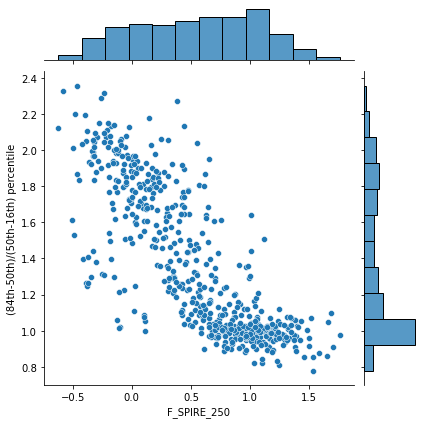

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew)


g.savefig('../../data/figs/sk_SPIRE250_SPIRE-NEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_SPIRE-NEP.png', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


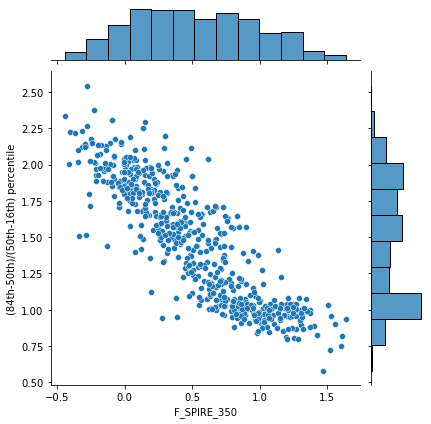

In [5]:
skew=(cat['FErr_SPIRE_350_u']- cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew)


g.savefig('../../data/figs/sk_SPIRE350_SPIRE-NEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_SPIRE-NEP.png', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


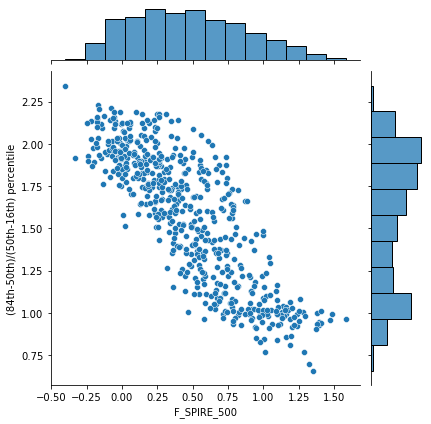

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew)


g.savefig('../../data/figs/sk_SPIRE500_SPPIRE-NEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_SPIRE-NEP.png', bbox='tight')

In [14]:
10**0.8

6.309573444801933

## Add flag to catalogue

In [15]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [16]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 6)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 6)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)


In [17]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

372 420 435 562


In [18]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [19]:
cat.write('./data/dmu26_XID+SPIRE_SPIRE-NEP_cat_20191107.fits', format='fits',overwrite=True)


In [22]:
#ind_good=SERVS_cat['flag_spire_250'] | SERVS_cat['flag_spire_350'] | SERVS_cat['flag_spire_500']

In [21]:
ind_good=cat['flag_spire_250'] | cat['flag_spire_350'] | cat['flag_spire_500']

In [22]:
np.invert(ind_good).sum()

58

In [23]:
cat[np.invert(ind_good)][0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J174041.877+684947.774,265.174489176941,68.8299373262451,23.905579,30.389473,17.77562,21.03715,26.712648,15.338702,14.443999,20.87114,6.9359407,-0.2292165,-0.7872364,-1.5496583,0.042607382,0.13954623,0.28428164,0.9991128,0.9989782,0.998928,2000.0,2000.0,2000.0,0.0,0.0,0.0,False,False,False
HELP_J174026.057+684907.000,265.108570426941,68.8186111162451,11.411757,18.759418,4.5667305,8.959636,15.010509,3.4554453,6.092504,13.070602,1.8403608,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,0.9996537,0.9987545,0.9982901,2000.0,2000.0,2000.0,0.0,0.0,0.0,False,False,False
HELP_J173946.192+684859.647,264.942466436941,68.8165686462451,10.27171,21.669844,3.320547,8.953802,18.001421,2.5196438,7.448657,16.367624,2.0757935,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,0.99951845,0.9987604,0.99826616,2000.0,2000.0,2000.0,0.086,0.0,0.0,False,False,False
HELP_J174010.720+684953.820,265.044667596941,68.8316167362451,11.501781,16.73385,6.0413814,11.945935,17.827541,6.2461433,12.437603,19.208323,5.6531744,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,0.9997504,0.99909294,0.99856865,2000.0,2000.0,2000.0,0.0,0.0,0.0,False,False,False
HELP_J174052.449+685100.510,265.218536686941,68.8501417662451,6.076712,10.096989,2.4936304,8.227646,12.37813,4.112256,8.071474,13.018028,3.9894085,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,0.9985076,0.99896777,0.99862546,2000.0,2000.0,2000.0,0.0,0.0,0.0,False,False,False
HELP_J174105.772+685304.747,265.274051186941,68.8846519162451,11.734792,14.712699,8.677291,8.950842,12.150583,5.7062116,7.9482255,11.62721,4.2478848,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,0.9991746,0.99839073,0.9986265,2000.0,2000.0,2000.0,0.0,0.019,0.0,False,False,False
HELP_J174049.536+685211.211,265.206401926941,68.8697808862451,11.1968975,14.070527,8.295566,6.7465005,10.1386175,3.234449,8.359652,12.090958,4.710734,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,0.9991297,0.9994383,0.999434,2000.0,2000.0,2000.0,0.0,0.002,0.0,False,False,False
HELP_J173950.866+685055.300,264.961942476941,68.8486944362451,45.132977,52.558,36.479805,33.39092,41.80491,21.800623,10.365823,18.493341,3.7835562,-0.3737247,-1.0883186,-2.2402248,3.1860301,2.7875817,0.22515395,1.0024452,0.9992003,0.9996111,2000.0,2000.0,2000.0,0.0,0.0,0.0,False,False,False
